In [363]:
# Smukke farver trololulu
color_SSN = "crimson"
color_SSN_uncert = "black"
color_WSO = "teal"
color_WSO_uncert = "purple"



In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Indlæsning af data

C:\Users\marcu\AppData\Local\Temp\ipykernel_8884\3959441226.py:24: RuntimeWarning: invalid value encountered in sqrt
  SSN_uncert_arr.append(SSN_std_arr[i]/np.sqrt(N_obs_arr[i]))
C:\Users\marcu\AppData\Local\Temp\ipykernel_8884\3959441226.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  SSN_uncert_arr.append(SSN_std_arr[i]/np.sqrt(N_obs_arr[i]))


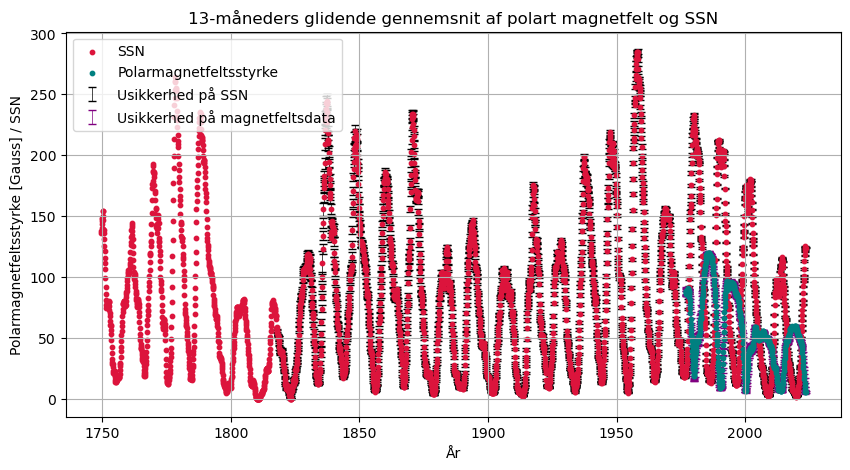

In [365]:
loc1 = r"C:\Users\marcu\OneDrive\Documents\GitHub\Solpletter_projekt\Magnus carlsen\data\WSO_smoothed.csv"

column_names = ['Date', 'Magnetic_field', 'Uncertainty']
wso_smoothed_data = pd.read_csv(loc1, names=column_names, delimiter=',', skiprows=1)
wso_smoothed_date_arr = wso_smoothed_data['Date'].values.astype(float)
wso_smoothed_magnetic_field_arr = wso_smoothed_data['Magnetic_field'].values.astype(float)
wso_smoothed_uncert_arr = wso_smoothed_data['Uncertainty'].values.astype(float)

loc2 = r"C:\Users\marcu\OneDrive\Documents\GitHub\Solpletter_projekt\Magnus carlsen\data\13-month smoothed monthly total sunspot number 1-1749 to now.csv"

column_names = ['Year', 'Year_fraction', 'Monthly_smoothed_sunspot_number', 'SSN_STD', 'N_obs', 'DefProvMarker']
sunspot_raw_data = pd.read_csv(loc2, names=column_names, delimiter=';', skiprows=1)
sunspot_raw_data = sunspot_raw_data.iloc[6:-6]

# Sunspot data
SSN_date_fraction_arr = sunspot_raw_data['Year_fraction'].values.astype(float)
SSN_arr = sunspot_raw_data['Monthly_smoothed_sunspot_number'].values.astype(float)
SSN_std_arr = abs(sunspot_raw_data['SSN_STD'].values.astype(float))
N_obs_arr = sunspot_raw_data['N_obs'].values.astype(float)

# Usikkerhed beregnes med "usikkerheden på middelværdien"
SSN_uncert_arr = []
for i in range(len(SSN_arr)):
    SSN_uncert_arr.append(SSN_std_arr[i]/np.sqrt(N_obs_arr[i]))

# Plot
ScatterSize = 10
plt.figure(figsize=(10, 5))

plt.grid(True)
plt.scatter(SSN_date_fraction_arr, SSN_arr, label='SSN', s=ScatterSize, c=color_SSN)
plt.errorbar(SSN_date_fraction_arr, SSN_arr, label="Usikkerhed på SSN", yerr=SSN_uncert_arr, fmt='none', color=color_SSN_uncert, elinewidth=0.5, capsize=3,  zorder=0)
plt.scatter(wso_smoothed_date_arr, wso_smoothed_magnetic_field_arr, label='Polarmagnetfeltsstyrke', s=ScatterSize, c=color_WSO)
plt.errorbar(wso_smoothed_date_arr, wso_smoothed_magnetic_field_arr, label="Usikkerhed på magnetfeltsdata", yerr=wso_smoothed_uncert_arr, fmt='none', color=color_WSO_uncert, elinewidth=0.5, capsize=3,  zorder=0)
plt.xlabel('År')
plt.ylabel('Polarmagnetfeltsstyrke [Gauss] / SSN')
plt.title('13-måneders glidende gennemsnit af polart magnetfelt og SSN')
plt.legend()
plt.show()


# Fits

In [366]:
# Det index hvor SSN_date_fraction_arr = 1818.538
index = np.where(SSN_date_fraction_arr == 1818.538)[0][0]

# Gem gamle data under andet navn
SSN_date_fraction_arr_old = SSN_date_fraction_arr
SSN_arr_old = SSN_arr
SSN_uncert_arr_old = SSN_uncert_arr

# Slet data før det index
SSN_date_fraction_arr = SSN_date_fraction_arr[index:]
SSN_arr = SSN_arr[index:]
SSN_uncert_arr = SSN_uncert_arr[index:]


In [367]:
# Fitting

guess6 = "-1830.7991628503528 0.11463396647006208 -41.8435005496725 -33286.960050892056 -1.7092473002101747 -0.06082285788548878 142.72177741674702 33312.73579656044 1829.8443727031058 0.11462460695763366 -54.39202596655013 89.88350715980764 -236.8003328013286 -0.0006882305476911399 90.79138890378951 68.9793140547413 -1.0249714319490588 0.1286004624939206 104.73177774481829 55.96194567874268 11.436101374088974 0.5711879226607226 -30.401004134319383 19.212479087233667".split(" ")
guess6 = [float(i) for i in guess6]

#1
def sin1(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
Var1 , Cov1 = curve_fit(sin1 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[300,1/11,1,-100])

#2
def sin2(x,a1,b1,c1,d1,a2,b2,c2,d2):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2
Var2 , Cov2 = curve_fit(sin2 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var1,1,1/210,1,100])

#3
def sin3(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3
Var3 , Cov3 = curve_fit(sin3 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var2,1,1/11.9,1,1])

#4
def sin4(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4
Var4 , Cov4 = curve_fit(sin4 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var3,1,1/21,1,1])

#5
def sin5(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5
Var5 , Cov5 = curve_fit(sin5 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var4,1,1/5.5,1,1])

#6
def sin6(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6):
    return (a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6)
Var6 , Cov6 = curve_fit(sin6 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6)




In [368]:
# Fitting

guess6 = "-1830.7991628503528 0.11463396647006208 -41.8435005496725 -33286.960050892056 -1.7092473002101747 -0.06082285788548878 142.72177741674702 33312.73579656044 1829.8443727031058 0.11462460695763366 -54.39202596655013 89.88350715980764 -236.8003328013286 -0.0006882305476911399 90.79138890378951 68.9793140547413 -1.0249714319490588 0.1286004624939206 104.73177774481829 55.96194567874268 11.436101374088974 0.5711879226607226 -30.401004134319383 19.212479087233667".split(" ")
guess6 = [float(i) for i in guess6]

#1
def sin1(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
Var1 , Cov1 = curve_fit(sin1 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:4])

#2
def sin2(x,a1,b1,c1,d1,a2,b2,c2,d2):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2
Var2 , Cov2 = curve_fit(sin2 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:8])

#3
def sin3(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3):
    return a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3)
Var3 , Cov3 = curve_fit(sin3 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:12])

#4
def sin4(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4):
    return a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4
Var4 , Cov4 = curve_fit(sin4 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*guess6[:12],1,1/21,1,1])

#5
def sin5(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5):
    return a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5
Var5 , Cov5 = curve_fit(sin5 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:20])

#6
def sin6(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6):
    return (a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4 + (a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6))
Var6 , Cov6 = curve_fit(sin6 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6)

#7
def sin7(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6,a7,b7,c7,d7):
    return (a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4 + (a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6) * a7 + np.sin( x * b7 + c7 ) + d7)
Var7 , Cov7 = curve_fit(sin7 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*guess6,200,1/11.5,1,1])

#8
def sin8(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6,a7,b7,c7,d7,a8,b8,c8,d8):
    return (a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4 + (a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6) + a7 * np.sin( x * b7 + c7 ) + d7 + a8 * np.sin( x * b8 + c8 ) + d8)
Var8 , Cov8 = curve_fit(sin8 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var7,100,1/5.5,1,1])

#9
def sin9(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6,a7,b7,c7,d7,a8,b8,c8,d8,a9,b9,c9,d9):
    return abs(a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4 + (a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6) + a7 * np.sin( x * b7 + c7 ) + d7 + a8 * np.sin( x * b8 + c8 ) + d8 + a9 * np.sin( x * b9 + c9 ) + d9)
Var9 , Cov9 = curve_fit(sin9 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var8,100,1/5.5,1,1])





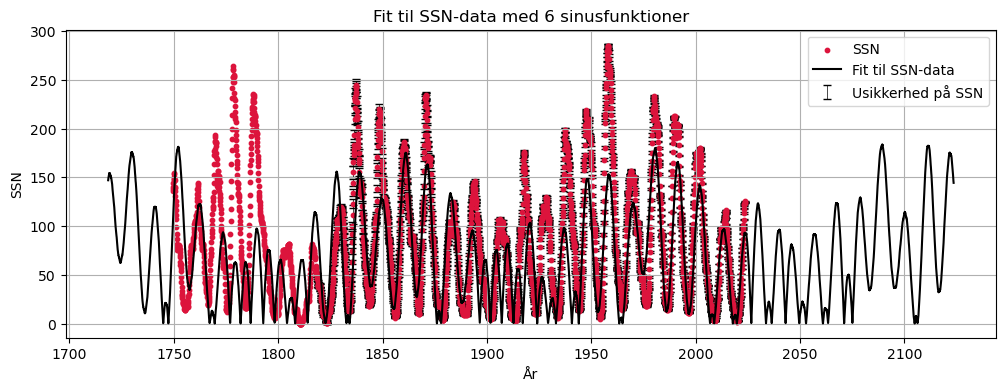

In [369]:
x=np.linspace(SSN_date_fraction_arr[0] - 100, SSN_date_fraction_arr[-1] + 100, 10000)

plt.figure(figsize=(12,4))

plt.grid(True)
plt.scatter(SSN_date_fraction_arr_old, SSN_arr_old, label='SSN', s=ScatterSize, c=color_SSN)
plt.errorbar(SSN_date_fraction_arr, SSN_arr, label="Usikkerhed på SSN", yerr=SSN_uncert_arr, fmt='none', color=color_SSN_uncert, elinewidth=0.5, capsize=3,  zorder=0)
plt.plot(x, sin9(x, *Var9), label='Fit til SSN-data', color='black')
plt.xlabel('År')
plt.ylabel('SSN')
plt.title('Fit til SSN-data med 6 sinusfunktioner')
plt.legend()
plt.show()



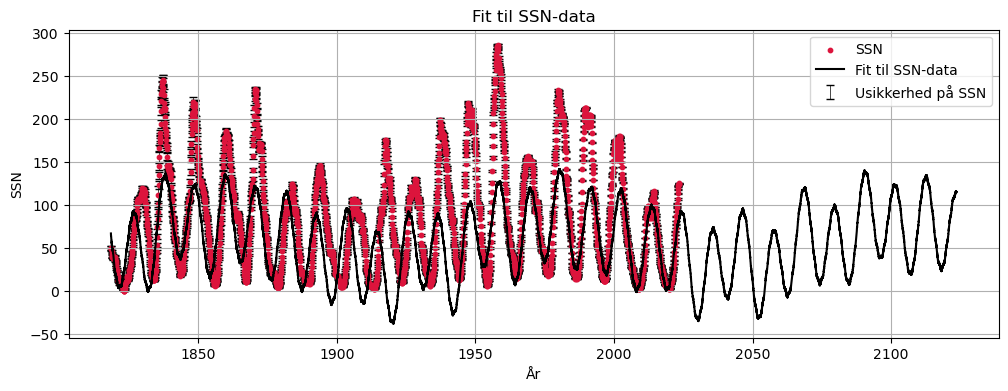

In [370]:
x=np.linspace(SSN_date_fraction_arr[0], SSN_date_fraction_arr[-1] + 100, 10000)

plt.figure(figsize=(12,4))

plt.grid(True)
plt.scatter(SSN_date_fraction_arr, SSN_arr, label='SSN', s=ScatterSize, c=color_SSN)
plt.errorbar(SSN_date_fraction_arr, SSN_arr, label="Usikkerhed på SSN", yerr=SSN_uncert_arr, fmt='none', color=color_SSN_uncert, elinewidth=0.5, capsize=3,  zorder=0)
plt.plot(x, sin7(x, *Var7), label='Fit til SSN-data', color='black')
plt.xlabel('År')
plt.ylabel('SSN')
plt.title('Fit til SSN-data')
plt.legend()
plt.show()



## Fit efter maksimum

In [371]:
# Peak data
Peak_dates = [1761.455, 1769.707, 1778.371, 1788.124, 1805.123, 1816.373, 1829.874, 1837.204,
 1848.124, 1860.124, 1870.623, 1883.958, 1894.042, 1906.123, 1917.623, 1928.29,
 1937.288, 1947.371, 1958.204, 1968.874, 1979.958, 1989.874, 2001.874, 2014.288]

Peak_values = [144.1, 193, 264.3, 235.3, 82, 81.2, 119.2, 244.9, 219.9, 186.2, 234, 124.4,
 146.5, 107.1, 175.7, 130.2, 198.6, 218.7, 285, 156.6, 232.9, 212.5, 180.3, 116.4]

Peak_uncert = [1,       1,         1,         1,         1,         1,
 3.16593713, 5.71576766, 5.21418184, 3.10111215, 3.08921119, 2.24506628,
 1.93973726, 1.73863658, 2.11934256, 1.8622567, 2.30043474, 1.84993461,
 2.02953991, 1.53362316, 1.83197408, 0.54152982, 0.47870158, 0.37195955,
 0.54349298]

# Fitting

guess6 = "-1830.7991628503528 0.11463396647006208 -41.8435005496725 -33286.960050892056 -1.7092473002101747 -0.06082285788548878 142.72177741674702 33312.73579656044 1829.8443727031058 0.11462460695763366 -54.39202596655013 89.88350715980764 -236.8003328013286 -0.0006882305476911399 90.79138890378951 68.9793140547413 -1.0249714319490588 0.1286004624939206 104.73177774481829 55.96194567874268 11.436101374088974 0.5711879226607226 -30.401004134319383 19.212479087233667".split(" ")
guess6 = [float(i) for i in guess6]

#1
def sin1(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
pVar1 , pCov1 = curve_fit(sin1 , Peak_dates , Peak_values , maxfev=10000 , p0=[1000, 0.06, 500, 50])

#2
def sin2(x,a1,b1,c1,d1,a2,b2,c2,d2):
    return (a1 * np.sin( x * b1 + c1 ) + d1) * (a2 * np.sin( x * b2 + c2 ) + d2)
pVar2 , pCov2 = curve_fit(sin2 , Peak_dates , Peak_values , maxfev=10000 , p0=[*pVar1,1,1,1,1])

#3
def sin3(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3):
    return (a1 * np.sin( x * b1 + c1 ) + d1) * (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3)
pVar3 , pCov3 = curve_fit(sin3 , Peak_dates , Peak_values , maxfev=10000 , p0=[*pVar2,1,1,1,1])

#4
def sin4(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4):
    return (a1 * np.sin( x * b1 + c1 ) + d1) * (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4
pVar4 , pCov4 = curve_fit(sin4 , Peak_dates , Peak_values , maxfev=10000 , p0=[*pVar3,1,1,1,1])




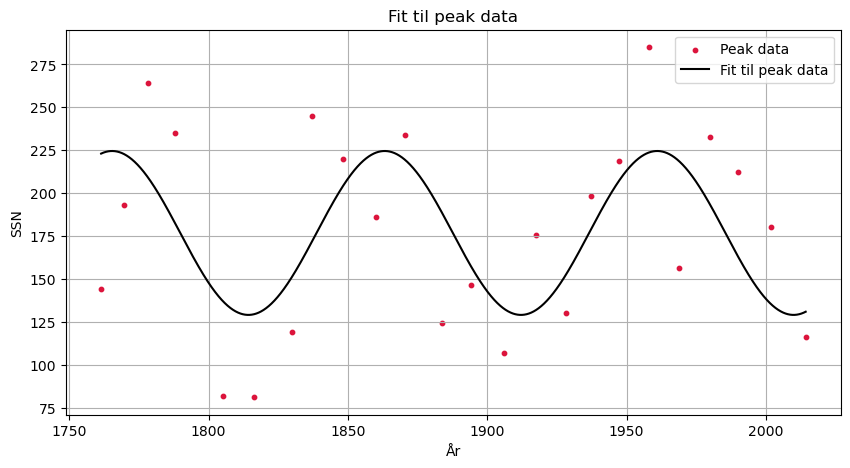

In [380]:
x=np.linspace(Peak_dates[0], Peak_dates[-1], 10000)

# Plot
plt.figure(figsize=(10, 5))

plt.grid(True)
plt.scatter(Peak_dates, Peak_values, label='Peak data', s=ScatterSize, c=color_SSN)
plt.plot(x, sin1(x, *pVar1), label='Fit til peak data', color='black')
plt.xlabel('År')
plt.ylabel('SSN')
plt.title('Fit til peak data')
plt.legend()
plt.show()


## Chi-kvadrat

In [373]:
# chi_kvadrat
def module_chi_squared(obs_data, model_data, obs_data_uncert):
    chi_squared = np.sum(((obs_data - model_data) / obs_data_uncert) ** 2)
    return chi_squared

# Reduceret chi_kvadrat
def module_chi_squared_reduced(obs_data, model_data, obs_data_uncert, num_params):
    chi_squared_reduced = module_chi_squared(obs_data, model_data, obs_data_uncert) / (len(obs_data) - num_params)
    return chi_squared_reduced



In [374]:
# Udregn chi-kvadrat for hvert fit
chi_squared_1 = module_chi_squared(SSN_arr, sin1(SSN_date_fraction_arr, *Var1), SSN_uncert_arr)
chi_squared_2 = module_chi_squared(SSN_arr, sin2(SSN_date_fraction_arr, *Var2), SSN_uncert_arr)
chi_squared_3 = module_chi_squared(SSN_arr, sin3(SSN_date_fraction_arr, *Var3), SSN_uncert_arr)
chi_squared_4 = module_chi_squared(SSN_arr, sin4(SSN_date_fraction_arr, *Var4), SSN_uncert_arr)
chi_squared_5 = module_chi_squared(SSN_arr, sin5(SSN_date_fraction_arr, *Var5), SSN_uncert_arr)
chi_squared_6 = module_chi_squared(SSN_arr, sin6(SSN_date_fraction_arr, *Var6), SSN_uncert_arr)
chi_squared_7 = module_chi_squared(SSN_arr, sin7(SSN_date_fraction_arr, *Var7), SSN_uncert_arr)
chi_squared_8 = module_chi_squared(SSN_arr, sin8(SSN_date_fraction_arr, *Var8), SSN_uncert_arr)
chi_squared_9 = module_chi_squared(SSN_arr, sin9(SSN_date_fraction_arr, *Var9), SSN_uncert_arr)

# Udregn reduceret chi-kvadrat for hvert fit
chi_squared_reduced_1 = module_chi_squared_reduced(SSN_arr, sin1(SSN_date_fraction_arr, *Var1), SSN_uncert_arr, 4)
chi_squared_reduced_2 = module_chi_squared_reduced(SSN_arr, sin2(SSN_date_fraction_arr, *Var2), SSN_uncert_arr, 8)
chi_squared_reduced_3 = module_chi_squared_reduced(SSN_arr, sin3(SSN_date_fraction_arr, *Var3), SSN_uncert_arr, 12)
chi_squared_reduced_4 = module_chi_squared_reduced(SSN_arr, sin4(SSN_date_fraction_arr, *Var4), SSN_uncert_arr, 16)
chi_squared_reduced_5 = module_chi_squared_reduced(SSN_arr, sin5(SSN_date_fraction_arr, *Var5), SSN_uncert_arr, 20)
chi_squared_reduced_6 = module_chi_squared_reduced(SSN_arr, sin6(SSN_date_fraction_arr, *Var6), SSN_uncert_arr, 24)
chi_squared_reduced_7 = module_chi_squared_reduced(SSN_arr, sin7(SSN_date_fraction_arr, *Var7), SSN_uncert_arr, 28)
chi_squared_reduced_8 = module_chi_squared_reduced(SSN_arr, sin8(SSN_date_fraction_arr, *Var8), SSN_uncert_arr, 32)
chi_squared_reduced_9 = module_chi_squared_reduced(SSN_arr, sin9(SSN_date_fraction_arr, *Var9), SSN_uncert_arr, 36)

print("chi_squared_1: ", chi_squared_1)
print("chi_squared_2: ", chi_squared_2)
print("chi_squared_3: ", chi_squared_3)
print("chi_squared_4: ", chi_squared_4)
print("chi_squared_5: ", chi_squared_5)
print("chi_squared_6: ", chi_squared_6)
print("chi_squared_7: ", chi_squared_7)
print("chi_squared_8: ", chi_squared_8)
print("chi_squared_9: ", chi_squared_9)

print()

print("chi_squared_reduced_1: ", chi_squared_reduced_1)
print("chi_squared_reduced_2: ", chi_squared_reduced_2)
print("chi_squared_reduced_3: ", chi_squared_reduced_3)
print("chi_squared_reduced_4: ", chi_squared_reduced_4)
print("chi_squared_reduced_5: ", chi_squared_reduced_5)
print("chi_squared_reduced_6: ", chi_squared_reduced_6)
print("chi_squared_reduced_7: ", chi_squared_reduced_7)
print("chi_squared_reduced_8: ", chi_squared_reduced_8)
print("chi_squared_reduced_9: ", chi_squared_reduced_9)



chi_squared_1:  24208967.173562817
chi_squared_2:  4.030209525321998e+33
chi_squared_3:  1521924017089.6755
chi_squared_4:  2.1351908323085844e+20
chi_squared_5:  26065796.22635727
chi_squared_6:  8356802.631733894
chi_squared_7:  8650660.373359023
chi_squared_8:  7377675.836724553
chi_squared_9:  5760494.906389668

chi_squared_reduced_1:  9853.05949269956
chi_squared_reduced_2:  1.6429716776689758e+30
chi_squared_reduced_3:  621447128.2522154
chi_squared_reduced_4:  8.732886839707912e+16
chi_squared_reduced_5:  10678.327007930058
chi_squared_reduced_6:  3429.1352612777573
chi_squared_reduced_7:  3555.552968910408
chi_squared_reduced_8:  3037.3305215004334
chi_squared_reduced_9:  2375.461817067904


# Fit kun med data efter hvor der også er magnetfeltsdata

In [375]:
# # Skær arrays til så de har samme længde
# min_length = min(len(SSN_arr), len(wso_smoothed_magnetic_field_arr))
# SSN_arr = SSN_arr[-min_length:]
# SSN_date_fraction_arr = SSN_date_fraction_arr[-min_length:]
# SSN_uncert_arr = SSN_uncert_arr[-min_length:]
# wso_smoothed_magnetic_field_arr = wso_smoothed_magnetic_field_arr[-min_length:]
# wso_smoothed_uncert_arr = wso_smoothed_uncert_arr[-min_length:]







In [376]:
# Fitting

guess6 = "-1830.7991628503528 0.11463396647006208 -41.8435005496725 -33286.960050892056 -1.7092473002101747 -0.06082285788548878 142.72177741674702 33312.73579656044 1829.8443727031058 0.11462460695763366 -54.39202596655013 89.88350715980764 -236.8003328013286 -0.0006882305476911399 90.79138890378951 68.9793140547413 -1.0249714319490588 0.1286004624939206 104.73177774481829 55.96194567874268 11.436101374088974 0.5711879226607226 -30.401004134319383 19.212479087233667".split(" ")
guess6 = [float(i) for i in guess6]

#1
def sin1(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
Var1 , Cov1 = curve_fit(sin1 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:4])

#2
def sin2(x,a1,b1,c1,d1,a2,b2,c2,d2):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2
Var2 , Cov2 = curve_fit(sin2 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:8])

#3
def sin3(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3
Var3 , Cov3 = curve_fit(sin3 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:12])

#4
def sin4(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4
Var4 , Cov4 = curve_fit(sin4 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*guess6[:12],1,1/21,1,1])

#5
def sin5(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5
Var5 , Cov5 = curve_fit(sin5 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:20])

#6
def sin6(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6):
    return (a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6)
Var6 , Cov6 = curve_fit(sin6 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6)

#7
def sin7(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6,a7,b7,c7,d7):
    return (a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6) + a7 * np.sin( x * b7 + c7 ) + d7
Var7 , Cov7 = curve_fit(sin7 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*guess6,1,1/5.5,1,1])

#8
def sin8(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6,a7,b7,c7,d7,a8,b8,c8,d8):
    return (a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6) + a7 * np.sin( x * b7 + c7 ) + d7 + a8 * np.sin( x * b8 + c8 ) + d8
Var8 , Cov8 = curve_fit(sin8 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var7,100,1/5.5,1,1])

#9
def sin9(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6,a7,b7,c7,d7,a8,b8,c8,d8,a9,b9,c9,d9):
    return (a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6) + a7 * np.sin( x * b7 + c7 ) + d7 + a8 * np.sin( x * b8 + c8 ) + d8 + a9 * np.sin( x * b9 + c9 ) + d9
Var9 , Cov9 = curve_fit(sin9 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var8,100,1/5.5,1,1])





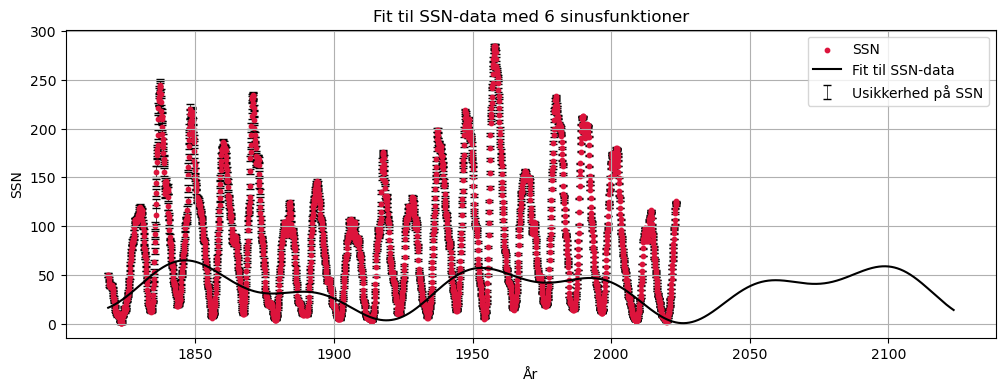

In [377]:
x=np.linspace(SSN_date_fraction_arr[0], SSN_date_fraction_arr[-1] + 100, 10000)

plt.figure(figsize=(12,4))

plt.grid(True)
plt.scatter(SSN_date_fraction_arr, SSN_arr, label='SSN', s=ScatterSize, c=color_SSN)
plt.errorbar(SSN_date_fraction_arr, SSN_arr, label="Usikkerhed på SSN", yerr=SSN_uncert_arr, fmt='none', color=color_SSN_uncert, elinewidth=0.5, capsize=3,  zorder=0)
plt.plot(x, sin2(x, *Var2), label='Fit til SSN-data', color='black')
plt.xlabel('År')
plt.ylabel('SSN')
plt.title('Fit til SSN-data med 6 sinusfunktioner')
plt.legend()
plt.show()

